In [57]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import WordNetLemmatizer, LancasterStemmer
import re
import nltk

In [58]:
df_tet = pd.read_csv('data_tet.csv')

## Binance

In [59]:
df_tet.head()

,Unnamed: 0,id,text,datetime,Location
0,0,1482845765823188995,b'RT @GoldTelegraph_: Tether executives are un...,2022-01-16 22:42:35,NaN
1,1,1482845324473470980,b'RT @GoldTelegraph_: Tether executives are un...,2022-01-16 22:40:49,NaN
2,2,1482844716513341441,b'@Massive_game #KODIV2 #KODI2022 #NFTs #Pitch...,2022-01-16 22:38:24,NaN
3,3,1482844697773047808,b'RT @HamEggsnSam: Now do #Tether!',2022-01-16 22:38:20,NaN
4,4,1482844663736422410,b'@Massive_game #KODIV2 #KODI2022 #NFTs #Pitch...,2022-01-16 22:38:12,NaN


In [60]:
mask = df_tet.duplicated(subset=['text'])
df_tet[mask]

,Unnamed: 0,id,text,datetime,Location
1,1,1482845324473470980,b'RT @GoldTelegraph_: Tether executives are un...,2022-01-16 22:40:49,NaN
5,5,1482844619255816200,b'RT @GoldTelegraph_: Tether executives are un...,2022-01-16 22:38:01,NaN
9,9,1482844492575170567,b'RT @GoldTelegraph_: Tether executives are un...,2022-01-16 22:37:31,NaN
17,17,1482844160449290243,b'RT @GoldTelegraph_: Tether executives are un...,2022-01-16 22:36:12,NaN
20,20,1482844031294259203,b'RT @GoldTelegraph_: Tether executives are un...,2022-01-16 22:35:41,NaN
...,...,...,...,...,...
1987,1987,1482615733184077827,b'RT @RareHippo: Turkish investors favor Bitco...,2022-01-16 07:28:31,NaN
1988,1988,1482615540715700226,b'RT @Timsomor: I wonder how this big tether \...,2022-01-16 07:27:45,NaN
1993,1993,1482614777331720193,"b'RT @BTCTN: This week, the current total supp...",2022-01-16 07:24:43,NaN
1994,1994,1482614652362276869,b'RT @vinibarbosabr: Aparentemente a #Tether c...,2022-01-16 07:24:13,NaN


In [61]:
df_tet = df_tet[~mask].reset_index(drop=True)
df_tet.shape

(1475, 5)

In [62]:
df_tet.head()

,Unnamed: 0,id,text,datetime,Location
0,0,1482845765823188995,b'RT @GoldTelegraph_: Tether executives are un...,2022-01-16 22:42:35,NaN
1,2,1482844716513341441,b'@Massive_game #KODIV2 #KODI2022 #NFTs #Pitch...,2022-01-16 22:38:24,NaN
2,3,1482844697773047808,b'RT @HamEggsnSam: Now do #Tether!',2022-01-16 22:38:20,NaN
3,4,1482844663736422410,b'@Massive_game #KODIV2 #KODI2022 #NFTs #Pitch...,2022-01-16 22:38:12,NaN
4,6,1482844612326825988,b'@Massive_game #KODIV2 #KODI2022 #NFTs #Pitch...,2022-01-16 22:38:00,NaN


In [63]:
df_tet_orig = df_tet.copy()

In [64]:
for tweet in df_tet['text'].sample(5).values:
    print(tweet)

b'@Titans_ventures @melos_studio Currently there are notable problems with stable coins like Tether (USDT) that have\xe2\x80\xa6 https://t.co/AebSybrtMQ'
b'RT @Okami_mxsamurai: \xf0\x9f\x94\x85Hope is like the sun; The closer you get to it, the less shadows the problems behind you will be\xf0\x9f\x94\x85\n\n\xf0\x9f\x94\x86#RBXSamurai\n\xf0\x9f\x94\x86#RBX\xe2\x80\xa6'
b'Stop using Tether ! Try to buy 72208 $PKN instead !!! #PKN #pokmi #PokenArmy #poken #PokenArmyProgram'
b'@CryptOrhann @elonmusk \n#SHINJA BuyTHEDIP!\n46KHOLDERS (50K-2Sksln wellbeBURNED\xf0\x9f\xa5\xb7\xf0\x9f\x9a\x80\xf0\x9f\x94\xa5\n#BabyDoge\n#BabyDogeCoin\xe2\x80\xa6 https://t.co/T00Lw8VXOi'
b'RT @BambroughKevin: Amazing.. when tether blows up it\xe2\x80\x99s gonna make a fantastic movie https://t.co/fyoqTZTCrR'


### Put all hashtags into a new column

In [65]:
df_tet['hashtag'] = df_tet['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df_tet.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482845765823188995,b'RT @GoldTelegraph_: Tether executives are un...,2022-01-16 22:42:35,NaN,[]
1,2,1482844716513341441,b'@Massive_game #KODIV2 #KODI2022 #NFTs #Pitch...,2022-01-16 22:38:24,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."
2,3,1482844697773047808,b'RT @HamEggsnSam: Now do #Tether!',2022-01-16 22:38:20,NaN,[Tether]
3,4,1482844663736422410,b'@Massive_game #KODIV2 #KODI2022 #NFTs #Pitch...,2022-01-16 22:38:12,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."
4,6,1482844612326825988,b'@Massive_game #KODIV2 #KODI2022 #NFTs #Pitch...,2022-01-16 22:38:00,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."


### Remove emojis

In [66]:
df_tet.text = df_tet.text.apply(lambda x: ' '.join([a for a in x.split() if '\\' not in a]))

In [67]:
test = df_tet.text
print(test)

0       b'RT @GoldTelegraph_: Tether executives are un...
1       b'@Massive_game #KODIV2 #KODI2022 #NFTs #Pitch...
2                     b'RT @HamEggsnSam: Now do #Tether!'
3       b'@Massive_game #KODIV2 #KODI2022 #NFTs #Pitch...
4       b'@Massive_game #KODIV2 #KODI2022 #NFTs #Pitch...
                              ...                        
1470    b"@Crypto__emily Actually, I almost never sell...
1471    b"hello @Tether_to So what's really the differ...
1472    b'Stop using Tether ! Try to buy 82868 $PKN in...
1473    b"@WatcherGuru I want to trade with Tether but...
1474    b'RT @MarcFalzon: This man is Samson Mow -- he...
Name: text, Length: 1475, dtype: object


In [68]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
def remove_special_characters(text):
    text = re.sub("@\S+", "", text) #remove mentions
    text = re.sub("https?:\/\/.*[\r\n]*", "", text) #remove hyperlinks
    text = re.sub("#", "", text) #remove hashtag symbol
    text = re.sub('\w*\d\w*', ' ', text) #remove numbers
    text = re.sub("b'RT",'', text) #remove b'RT
    text = re.sub("b'",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    return text

In [70]:
df_tet.text = df_tet.text.apply(remove_special_characters)

In [71]:
df_tet.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482845765823188995,Tether executives are under investigation fo...,2022-01-16 22:42:35,NaN,[]
1,2,1482844716513341441,NFTs PitchAgency Hotbit KODI Decoin Cert...,2022-01-16 22:38:24,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."
2,3,1482844697773047808,Now do Tether,2022-01-16 22:38:20,NaN,[Tether]
3,4,1482844663736422410,NFTs PitchAgency Hotbit KODI Decoin Cert...,2022-01-16 22:38:12,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."
4,6,1482844612326825988,NFTs PitchAgency Hotbit KODI Decoin Cert...,2022-01-16 22:38:00,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."


### Remove digits and lower the text

In [72]:
df_tet.text = df_tet.text.astype(str).str.replace('\d+', '')
df_tet.text = df_tet.text.str.lower()
df_tet.text.head()

/var/folders/bc/c9cbz3vx3k331bfmmjlgtbkm0000gn/T/ipykernel_40621/2846344682.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tet.text = df_tet.text.astype(str).str.replace('\d+', '')


0      tether executives are under investigation fo...
1         nfts pitchagency hotbit  kodi decoin cert...
2                                      now do tether  
3         nfts pitchagency hotbit  kodi decoin cert...
4         nfts pitchagency hotbit  kodi decoin cert...
Name: text, dtype: object

### Stemming text

In [73]:
from nltk.tokenize import TweetTokenizer

In [74]:
wnl = WordNetLemmatizer()
stemmer = LancasterStemmer()
def lemmatize_text(text):
    text = text.split(' ')
    for i, word in enumerate(text):
        text[i] = wnl.lemmatize(word)   #results for stemming is better lemmatization
        #text[i] = stemmer.stem(word)    
    return ' '.join(text)

In [75]:
df_tet.text = df_tet.text.apply(lemmatize_text)
df_tet.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482845765823188995,tether executive are under investigation for...,2022-01-16 22:42:35,NaN,[]
1,2,1482844716513341441,nfts pitchagency hotbit kodi decoin cert...,2022-01-16 22:38:24,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."
2,3,1482844697773047808,now do tether,2022-01-16 22:38:20,NaN,[Tether]
3,4,1482844663736422410,nfts pitchagency hotbit kodi decoin cert...,2022-01-16 22:38:12,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."
4,6,1482844612326825988,nfts pitchagency hotbit kodi decoin cert...,2022-01-16 22:38:00,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."


### Check if there is non-enlighs words and remove them

In [76]:
test = df_tet.text
test

0         tether executive are under investigation for...
1            nfts pitchagency hotbit  kodi decoin cert...
2                                         now do tether  
3            nfts pitchagency hotbit  kodi decoin cert...
4            nfts pitchagency hotbit  kodi decoin cert...
                              ...                        
1470    b  actually  i almost never sell my coin  mayb...
1471    b hello  so what s really the difference betwe...
1472    stop using tether   try to buy    pkn instead ...
1473    b  i want to trade with tether but still haven...
1474      this man is samson mow    he is the chief st...
Name: text, Length: 1475, dtype: object

In [77]:
import nltk
words = set(nltk.corpus.words.words())
keep_words = ['bitcoin', 'ethereum', 'binance','tether','solana','nft']

def keep_eng(text):
    return (" ".join(w for w in nltk.wordpunct_tokenize(text) if w in words or not w.isalpha() or w in keep_words))

In [78]:
df_tet.text = df_tet.text.apply(keep_eng)
print(df_tet.text)

0       tether executive are under investigation for b...
1                                                        
2                                           now do tether
3                                                        
4                                                        
                              ...                        
1470    b actually i almost never sell my coin maybe t...
1471    b hello so what s really the difference betwee...
1472                       stop tether try to buy instead
1473    b i want to trade with tether but still haven ...
1474    this man is samson mow he is the chief strateg...
Name: text, Length: 1475, dtype: object


### Remove rows containing empty tweets

In [79]:
print(f" There are {np.sum(df_tet.text == '')} rows that now have empty tweets.")

 There are 223 rows that now have empty tweets.


In [80]:
mask = df_tet.text == ''
df_tet[mask]

,Unnamed: 0,id,text,datetime,Location,hashtag
1,2,1482844716513341441,,2022-01-16 22:38:24,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."
3,4,1482844663736422410,,2022-01-16 22:38:12,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."
4,6,1482844612326825988,,2022-01-16 22:38:00,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."
5,7,1482844564331409408,,2022-01-16 22:37:48,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."
6,8,1482844505363652608,,2022-01-16 22:37:34,NaN,"[KODIV2, KODI2022, NFTs, PitchAgency, Hotbit, ..."
...,...,...,...,...,...,...
1451,1970,1482617860560244737,,2022-01-16 07:36:58,NaN,[]
1453,1972,1482617645379854336,,2022-01-16 07:36:07,NaN,[]
1454,1973,1482617463695196162,,2022-01-16 07:35:23,NaN,[]
1461,1981,1482616358609297415,,2022-01-16 07:31:00,NaN,"[crypto, Bitcoin, Ethereum, Binancecoin, Tethe..."


In [81]:
df_tet = df_tet[~mask]
df_tet.shape

(1252, 6)

### Tokenize the document

In [82]:
stop_words = nltk.corpus.stopwords.words('english')

In [83]:
## CountVectorize
cvec = CountVectorizer(stop_words=stop_words, max_df=7, min_df=3)
doc_word_cv = cvec.fit_transform(df_tet.text)
pd.DataFrame(doc_word_cv.toarray(), index=df_tet.text, columns=cvec.get_feature_names()).head(10)

,able,accept,according,account,add,added,advertising,ago,algorithmic,alive,...,work,world,wow,wrong,ya,yeah,year,yeni,yes,yok
text,,,,,,,,,,,,,,,,,,,,,
tether executive are under investigation for bank fraud by the justice department million worth of tether wa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
now do tether,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
he at family point to the vaccine mandate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tether,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bring back increase tether distance on console you idiot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
stop tether try to buy instead,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
you can gold a lot of people are chasing their dream and dragon in the time is to talk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
unhitch the straining the weighted into the away from,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b baby i been there wa at the point where all i really wa now i m still,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
##TFIDF
cv_tfidf = TfidfVectorizer(stop_words=stop_words,max_df =0.7, min_df=3)
doc_word_tfidf = cv_tfidf.fit_transform(df_tet.text)
pd.DataFrame(doc_word_tfidf.toarray(), index=df_tet.text, columns=cv_tfidf.get_feature_names()).head(10)

,able,accept,according,account,actually,add,added,address,advertising,ago,...,worth,would,wow,wrong,ya,yeah,year,yeni,yes,yok
text,,,,,,,,,,,,,,,,,,,,,
tether executive are under investigation for bank fraud by the justice department million worth of tether wa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.338832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
now do tether,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
he at family point to the vaccine mandate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tether,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bring back increase tether distance on console you idiot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stop tether try to buy instead,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
you can gold a lot of people are chasing their dream and dragon in the time is to talk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unhitch the straining the weighted into the away from,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b baby i been there wa at the point where all i really wa now i m still,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
doc_word_tfidf.shape

(1252, 431)

In [86]:
test = doc_word_tfidf.T

In [87]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

### NMF Model

In [88]:
from sklearn.decomposition import NMF, TruncatedSVD

In [89]:
n_topics=10
nmf = NMF(n_components=n_topics)
doc_topic=nmf.fit_transform(doc_word_tfidf)

/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [90]:
topic_word = pd.DataFrame(nmf.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                     "component_6","component_7","component_8","component_9","component_10"],
             columns = cv_tfidf.get_feature_names())
topic_word

,able,accept,according,account,actually,add,added,address,advertising,ago,...,worth,would,wow,wrong,ya,yeah,year,yeni,yes,yok
component_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_2,0.012,0.000,0.000,0.005,0.021,0.005,0.001,0.007,0.0,0.000,...,0.030,0.026,0.009,0.011,0.010,0.008,0.013,0.004,0.014,0.023
component_3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000
component_4,0.000,0.011,0.000,0.000,0.013,0.000,0.000,0.000,0.0,0.011,...,0.000,0.007,0.000,0.000,0.001,0.000,0.004,0.000,0.014,0.000
component_5,0.000,0.000,0.023,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.000,0.016,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000
component_7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_8,0.010,0.000,0.016,0.001,0.000,0.000,0.010,0.068,0.0,0.000,...,0.045,0.000,0.000,0.000,0.000,0.000,0.007,0.037,0.000,0.000
component_9,0.000,0.008,0.000,0.025,0.010,0.000,0.005,0.011,0.0,0.008,...,0.000,0.012,0.000,0.000,0.001,0.001,0.000,0.000,0.020,0.001
component_10,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [91]:
display_topics(nmf, cv_tfidf.get_feature_names(), 10)


Topic  0
try, stop, instead, buy, tether, question, start, retail, control, fee

Topic  1
tether, like, freeze, million, look, de, fraud, need, wa, democracy

Topic  2
another, start, rally, attempt, fake, pump, fud, everyone, question, back

Topic  3
bitcoin, de, binance, strike, para, long, si, become, big, lira

Topic  4
market, last, coin, volume, capitalization, unique, bag, could, top, change

Topic  5
top, time, alert, last, coin, volume, look, burner, ripple, nft

Topic  6
price, retail, demand, week, currently, day, bitcoin, let, easy, show

Topic  7
ethereum, freeze, supply, binance, frozen, solana, total, token, address, ha

Topic  8
coin, stable, ha, unstable, backed, death, bad, like, problem, notable

Topic  9
cap, last, coin, global, tether, today, change, trading, volume, month


In [92]:
## among all the topics, topic 9 contains a lot of unexplainanle words
## We need to inspect each topic to better under the content

In [93]:
print(doc_topic[0])

[0.00000000e+00 7.14689814e-02 0.00000000e+00 9.23536975e-05
 7.17381213e-04 8.50034624e-04 0.00000000e+00 8.10801984e-03
 0.00000000e+00 0.00000000e+00]


In [94]:
df_tet.text.iloc[0]

'tether executive are under investigation for bank fraud by the justice department million worth of tether wa'

In [95]:
df_tet['argmax_topic']=np.argmax(doc_topic, axis=1)
df_tet.argmax_topic.head(10)

0     1
2     1
8     1
10    1
13    1
14    0
16    5
17    8
22    1
23    3
Name: argmax_topic, dtype: int64

In [96]:
pd.Series(df_tet.argmax_topic).value_counts()

1    472
0    180
3    139
8    126
7    115
2     55
5     54
4     39
6     39
9     33
Name: argmax_topic, dtype: int64

In [ ]:
###########
# Topic 0 #  ### Poken (PKN) is the cross-chain utility token for Pokmi, formerly known as RarePorn
###########  ### an adult content NFT platform providing users and content creators a secure, private, 
###########  ### and uncensored ecosystem to buy and sell digital content through the transfer of non-fungible porn digital assets (NFPs).

In [123]:
df_tet_0=df_tet[df_tet.argmax_topic==0]
df_tet_0.text.iloc[80:100]

758                                                 beni
760                                                   mi
768                       stop tether try to buy instead
769                       stop tether try to buy instead
778                       stop tether try to buy instead
802                       stop tether try to buy instead
819                       stop tether try to buy instead
821                                                  pit
825                       stop tether try to buy instead
828                       stop tether try to buy instead
830                       stop tether try to buy instead
835                       stop tether try to buy instead
847                       stop tether try to buy instead
857                       stop tether try to buy instead
891                       stop tether try to buy instead
894                       stop tether try to buy instead
906    this gorilla is what when a tether ado dancing...
912                       stop 

In [100]:
df_tet_orig.iloc[79]

Unnamed: 0                                                   96
id                                          1482834807554027527
text          b'Stop using Tether ! Try to buy 25488 $PKN in...
datetime                                    2022-01-16 21:59:02
Location                                                    NaN
Name: 79, dtype: object

In [102]:
df_tet_orig.iloc[188]

Unnamed: 0                                                  266
id                                          1482820715304865796
text          b'Stop using Tether ! Try to buy 23807 $PKN in...
datetime                                    2022-01-16 21:03:02
Location                                                    NaN
Name: 188, dtype: object

In [104]:
df_tet_orig.text.iloc[334]

"b'Stop using Tether ! Try to buy 49727 $PKN instead !!! #PKN #pokmi #PokenArmy #poken #PokenArmyProgram'"

In [ ]:
###########
# Topic 1 #  ### Both positives and negatives, but since Tether is always equal to $1, there is not much growth here
###########  ### Main reason for negative comments is Tether executives are under investigation for bank fraud by the Justice Department
###  People are having doubts towards this token

In [128]:
df_tet_1=df_tet[df_tet.argmax_topic==1]
df_tet_1.text.iloc[240:260]

706    in the pantry the girl reach the end of her te...
714      i also believe that tether never corporate bond
730    b it s funny when bot accuse tether of doe any...
732    so a half a immigrant coon tether and some une...
735                                    b it s tether too
743    back in the office nice pump by and binance on...
748    sold all of my for tether this holding these i...
755    it to me that investor and trader believe in t...
756    b i m fine with pointing out the flaw and with...
761                         why wa tether to only second
762    what say you doe need to zoom out can you spar...
767    do you like a tether free life where you can e...
770                                        tether ne bey
774    b dumb tether just feel offended about me call...
783    i made the mistake of tether the fee were horr...
792                                               tether
804    or how low or how much corruption is actually ...
806                      no i a

In [108]:
df_tet_orig.text.iloc[27]

"b'Myanmar Democracy Group Look to Tether After Failure of Myanmar Dollar Project - BeInCrypto https://t.co/kPdr9UPS4r'"

In [112]:
df_tet_orig.text.iloc[117]

"b'@GiganticRebirth Are you confident to keep all of that money in tether?'"

In [115]:
df_tet_orig.text.iloc[216]

"b'RT @taskmaster4450: The news that Tether locked up over $160 million shows the importance of an algorithmic stablecoin like $HBD.\\n\\nThere is\\xe2\\x80\\xa6'"

In [117]:
df_tet_orig.text.iloc[255]

"b'@intocryptoverse at this point i just spend all of my tether on btc every second tuesday of every month lol'"

In [118]:
df_tet_orig.text.iloc[280]

"b'me when i have to do tank tether mechanics in p2s and p3s. https://t.co/b83dBzHHku'"

In [120]:
df_tet_orig.text.iloc[312]

"b'Tether executives are under investigation for bank fraud by the Justice Department, $160 million worth of Tether wa\\xe2\\x80\\xa6 https://t.co/riCENDUnRP'"

In [127]:
df_tet_orig.text.iloc[622]

'b"The arrival of Tether\'s USDT stablecoins in September 2020 and Circle and Coinbase\'s USDC the following month was a\\xe2\\x80\\xa6 https://t.co/0cfVcbHysr"'

In [129]:
df_tet_orig.text.iloc[811]

"b'@ACivility @WuBlockchain Fixes what? I doubt that UST can retrieve the stolen money unlike Tether'"

In [ ]:
###########
# Topic 2 #  #### 
###########

In [ ]:
df_tet_2=df_tet[df_tet.argmax_topic==2]
df_tet_2.text.iloc[21:40]

In [ ]:
df_tet_orig.text.iloc[54]

In [ ]:
df_tet_orig.text.iloc[111]

In [ ]:
df_tet_orig.text.iloc[277]

In [ ]:
df_tet_orig.text.iloc[680]

In [ ]:
###########
# Topic 3 #  #### Talks about bitcoin price drops, but comparing with Tether, Bitcoin still has a more promising future
###########

In [140]:
df_tet_3=df_tet[df_tet.argmax_topic==3]
df_tet_3.text.iloc[60:80]

729                                    the people in nft
734                                             her para
738                     six new billionaire join the nft
740                                              deposit
742    nobody can freeze your money when you use the ...
744    fluctuation in the lira exchange rate have som...
747    fluctuation in the lira exchange rate have som...
754            star mark these in his portfolio investor
764    bitcoin bubble will pop the holder dumping to ...
765                                             her para
766                                dollar teil de in den
772                        investment trader binary link
780    added new project plan daily min withdrawal up to
810    darn methinks is being in the to range to allo...
822                                          de en no se
823                                                short
831                     daily on chain exchange net flow
854    b a a bitcoin believer i

In [132]:
df_tet_orig.text.iloc[30]

'b"RT @HappyTr46601036: Bad Days for Bitcoin Are Back as \'Death Cross\' Approaches https://t.co/lWCD6yRXCi \\n\\n#BTC   Went Through a death Cross\\xe2\\x80\\xa6"'

In [133]:
df_tet_orig.text.iloc[176]

"b'RT @by_crypto_man: Focus on the big picture in Bitcoin. In the long run, decline is inevitable.#Bitcoin #ETH #XRP #SHIB #Tether #cryptocurr\\xe2\\x80\\xa6'"

In [135]:
df_tet_orig.text.iloc[484]

"b'@AltcoinDailyio Teach those who write that Tether is manipulating Bitcoin that this is impossible'"

In [136]:
df_tet_orig.text.iloc[553]

"b'@BTCTN I heard somewhere that #Solana could someday displace bitcoin, I think in terms of liquidity Tether would al\\xe2\\x80\\xa6 https://t.co/IEJkR4Deo1'"

In [138]:
df_tet_orig.text.iloc[603]

"b'@BibleAnarchist @zardigrade @PirateChain Tether is the future'"

In [141]:
df_tet_orig.text.iloc[854]

'b"@ThatNaimish As a Bitcoin believer I\'m not nervous about it at all. Tether truthers must be nervious"'

In [ ]:
###########
# Topic 4 #  ### 'Buy Signals' for binance, NFTs
###########

In [ ]:
df_tet_4=df_tet[df_tet.argmax_topic==4]
df_tet_4.text.iloc[20:40]

In [ ]:
df_tet_orig.text.iloc[18]

In [ ]:
df_tet_orig.text.iloc[190]

In [ ]:
df_tet_orig.text.iloc[309]

In [ ]:
df_tet_orig.text.iloc[753]

In [ ]:
###########
# Topic 5 #   ###More intellectual thinkings about Eth and other cryptos
###########

In [ ]:
df_tet_5=df_tet[df_tet.argmax_topic==5]
df_tet_5.text.iloc[0:20]

In [ ]:
df_tet_orig.text.iloc[55]

In [ ]:
df_tet_orig.text.iloc[274]

In [ ]:
df_tet_orig.text.iloc[1071]

In [ ]:
df_tet_orig.text.iloc[1122]

In [ ]:
###########
# Topic 6 #  ### A guy called Richard Heart(PulseX.com) posting about his Youtube Live event 
###########  ### talks how cryto change the future lives and financial system

In [ ]:
df_tet_6=df_tet[df_tet.argmax_topic==6]
df_tet_6.text.iloc[80:100]

In [ ]:
df_tet_orig.text.iloc[3]

In [ ]:
df_tet_orig.text.iloc[57]

In [ ]:
df_tet_orig.text.iloc[458]

In [ ]:
df_tet_orig.text.iloc[695]

In [142]:
###########
# Topic 7 #  ### More content about $160 million froze on Ethereum blockchain
###########

In [158]:
df_tet_7=df_tet[df_tet.argmax_topic==7]
df_tet_7.text.iloc[90:110]

1219                       apple bitcoin ethereum binance
1221                                     bitcoin ethereum
1236    task is dine sir tether ethereum bitcoin i hop...
1241                                                 yeni
1244                      tether ha frozen of on ethereum
1266      b pour la d en circulation sur la ethereum a de
1276      b pour la d en circulation sur la ethereum a de
1287                                     bitcoin ethereum
1292                   bitcoin binance ethereum avalanche
1301    when fell so did fell into that dark pit insid...
1326    this week the current total supply of tether i...
1328                         now bitcoin binance ethereum
1340    just in ha three ethereum address holding a co...
1355                                     bitcoin ethereum
1362                      tether ha frozen of on ethereum
1372    tether is not the they ethereum solana ripple ...
1381    issuer froze three ethereum address on holding...
1387          

In [145]:
df_tet_orig.text.iloc[70]

"b'RT @SpeedyCalls: Top 10 Cryptoassets by Market Cap:\\n\\n1  #Bitcoin (815.12b)\\n2  #Ethereum (397.65b)\\n3  #Binance Coin (83.63b)\\n4  #Tether (78.\\xe2\\x80\\xa6'"

In [146]:
df_tet_orig.text.iloc[158]

"b'RT @coinbureau: Further reminder that centralised stablecoins can and do freeze accounts, just like a bank. This is why I have been diversi\\xe2\\x80\\xa6'"

In [147]:
df_tet_orig.text.iloc[326]

"b'RT @pnxgrp: TOP 10 #ETHEREUM BURNER PROJECTS\\n\\n#opensea $ETH $UNI #uniswap #tether $USDT #looksrare $LOOKS $WTF #metamask $STRONG $USDC http\\xe2\\x80\\xa6'"

In [150]:
df_tet_orig.text.iloc[558]

"b'$APTY $SPRA will be the dominant #StableCoin soon. \\n\\nhttps://t.co/jFjAlB11ie https://t.co/gDwNCuHJ26'"

In [156]:
df_tet_orig.text.iloc[1105]

"b'#ethereum Could Circle freeze USDC on any wallet address just like Tether did to USDT? https://t.co/9CeOXxTmkz'"

In [157]:
df_tet_orig.text.iloc[1155]

"b'RT @RaiKazimAli: @Pakistanomy Telenor private database is on sale by a hacker for Bitcoin/ Tether/ Ethereum equivalent to USD 250. \\n\\nContai\\xe2\\x80\\xa6'"

In [159]:
df_tet_orig.text.iloc[1381]

"b'Stablecoin issuer @Tether_to froze three Ethereum addresses on Thursday, holding over $160 million worth of USDT, a\\xe2\\x80\\xa6 https://t.co/nYw3YjyuOU'"

In [ ]:
###########
# Topic 8 #  #### Debate between holding USDC (USD COIN) OR USDT (USD Tether)
###########

In [168]:
df_tet_8=df_tet[df_tet.argmax_topic==8]
df_tet_8.text.iloc[40:60]

548    huh what are the risk even tether or any other...
549    except theyre always butting head because each...
555    tether ha no physical form technically it a a ...
562    did you know color ha an effect on everybody t...
575    b i have quite a large position in stable coin...
579    if staff absence were a problem before i wonde...
593    break my heart to learn this ha to be away to ...
597     ha been successfully sent to your tether account
613    imagine if the law enforcement here is china o...
616                        totally backed by scam tether
627                                                bu en
635    b it could be tether printing money too t nece...
651    there are thousand of u who will be smashing w...
682                                tether robot mem coin
687    is like the sun the closer you get to it the s...
704    alright into sleep mode i feel like this week ...
710    death market ha so stable coin are unstable te...
713    death market ha so stabl

In [161]:
df_tet_orig.text.iloc[28]

"b'#BTC   death Cross\\nCRYPTO MARKET HAS COLLAPSED SO CALLED STABLE COINS ARE UNSTABLE #TETHER,#USDC,#USDT are Backed B\\xe2\\x80\\xa6 https://t.co/YB8ZE0sSd0'"

In [163]:
df_tet_orig.text.iloc[273]

"b'$usdt.d are we going to see a #trend #reversal with a #reverse #cupandhandle? Would mean a lot, could drive back to\\xe2\\x80\\xa6 https://t.co/vxT1dGCXNM'"

In [167]:
df_tet_orig.text.iloc[508]

'b"@CoinDesk @Tether_to @HeleneBraunn What\'s wrong with that? They were just complying with the law to eliminate fraudulent accounts"'

In [170]:
df_tet_orig.text.iloc[775]

"b'RT @enzonaescuta: Turkish crypto investors broadly hold #BTC and\\n#USDT, the number of people with #crypto trading accounts exceeds 5 millio\\xe2\\x80\\xa6'"

In [ ]:
###########
# Topic 9 #  ### General talks on cryptos: value fluctuations, investment analysis, projectection...
###########

In [ ]:
df_tet_9=df_tet[df_tet.argmax_topic==9]
df_tet_9.text.iloc[130:150]

In [ ]:
df_tet_orig.text.iloc[5]

In [ ]:
df_tet_orig.text.iloc[92]

In [ ]:
df_tet_orig.text.iloc[464]

In [ ]:
df_tet_orig.text.iloc[730]

In [171]:
#### In general, twitters about Ethereum is more random than Bitcoin, possibly because Eth is faster and cheaper
#### and a lot of other cryto database is actually based on Eth

### CorEx Model

In [172]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
words = list(np.asarray(cvec.get_feature_names()))
topic_model = ct.Corex(n_hidden=10, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(doc_word_cv, words=words)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: office,please,round,national,unity,rule,trader,investment,hacker,official
1: dog,capital,san,pet,pour,effort,dumb,owner,damn,circulation
2: big,job,work,man,whale,taking,hit,behind,bond,shadow
3: show,demand,retail,black,mystery,reserve,call,book,sol,code
4: literally,something,spent,hand,print,cute,die,ever,position,um
5: maybe,hold,wrong,fine,grab,account,order,pay,number,ask
6: polygon,someone,take,cosmos,live,likely,sold,yes,liquidity,station
7: year,went,bu,save,point,enough,ago,phone,house,lose
8: lost,since,oh,social,trust,imagine,china,anyone,wow,ya
9: love,frozen,reality,talking,ust,completely,logic,trade,nobody,den


### K-Means Clustering

In [174]:
from sklearn.cluster import KMeans

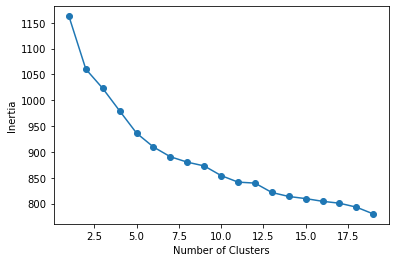

In [175]:
inertia = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, max_iter=200, n_init=10)
    km.fit(doc_word_tfidf)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');